In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
torch.set_default_dtype(torch.float64)
import torch.nn as nn
import copy
import random

In [2]:
import config as cfg
from model import DeepNN
from utils import relative_l2, set_seed
from train_reg import train_model_reg
from train_pde import train_model_pde

In [3]:
set_seed(0)
model = DeepNN().to(cfg.device_name)
model = train_model_reg(model, Nfit=400, lr=1e-1)

lbfgs : 0 - ref_rl2 1.7346e-01 
lbfgs : 50 - ref_rl2 6.7025e-03 
lbfgs : 100 - ref_rl2 5.5731e-03 
lbfgs : 150 - ref_rl2 5.3208e-03 
lbfgs : 200 - ref_rl2 5.1193e-03 
lbfgs : 250 - ref_rl2 4.9767e-03 
lbfgs : 300 - ref_rl2 4.8553e-03 
lbfgs : 350 - ref_rl2 4.7861e-03 
lbfgs : 399 - ref_rl2 4.7518e-03 


In [5]:
set_seed(50)
model_cur = DeepNN().to(cfg.device_name)
model_cur.load_state_dict(copy.deepcopy(model.state_dict()))
model_cur = train_model_pde(model_cur, Nfit=350, lr=1)

adam : 0 - ref_rl2 4.7531e-03 - pde 9.1050e-05 - lbc 8.6479e-05 - rbc 3.0137e-07 - tbc 4.0861e+02 - bbc 5.9499e-05
adam : 10 - ref_rl2 4.7453e-03 - pde 9.0900e-05 - lbc 8.3100e-05 - rbc 2.7978e-07 - tbc 3.9028e+02 - bbc 5.5368e-05
adam : 20 - ref_rl2 4.7387e-03 - pde 9.0773e-05 - lbc 8.0685e-05 - rbc 2.8193e-07 - tbc 4.0244e+02 - bbc 6.1902e-05
adam : 30 - ref_rl2 4.7301e-03 - pde 9.0610e-05 - lbc 8.1799e-05 - rbc 2.3931e-07 - tbc 3.8171e+02 - bbc 5.8876e-05
adam : 40 - ref_rl2 4.7223e-03 - pde 9.0460e-05 - lbc 8.1143e-05 - rbc 2.3502e-07 - tbc 3.3397e+02 - bbc 4.6807e-05
adam : 50 - ref_rl2 4.7187e-03 - pde 9.0392e-05 - lbc 7.0622e-05 - rbc 2.3221e-07 - tbc 3.5681e+02 - bbc 4.5775e-05
adam : 60 - ref_rl2 4.7143e-03 - pde 9.0307e-05 - lbc 6.9150e-05 - rbc 2.2117e-07 - tbc 3.4227e+02 - bbc 4.0604e-05
adam : 70 - ref_rl2 4.7046e-03 - pde 9.0121e-05 - lbc 6.9288e-05 - rbc 2.1808e-07 - tbc 3.7705e+02 - bbc 3.7750e-05
adam : 80 - ref_rl2 4.6836e-03 - pde 8.9720e-05 - lbc 6.5654e-05 - rbc 2.

In [6]:
X = cfg.X.detach().cpu()
Y = cfg.Y.detach().cpu()
E_reg = model(cfg.inp_fine, cfg.Z_fine).detach().cpu().reshape(cfg.Nx, cfg.Ny)
E_pinn = model_cur(cfg.inp_fine, cfg.Z_fine).detach().cpu().reshape(cfg.Nx, cfg.Ny)
E_ref = cfg.E_ref.cpu()

In [7]:
print('Regression Solution rl2: {:.4e}'.format(relative_l2(E_ref, E_reg)))
print('PINN Solution rl2: {:.4e}'.format(relative_l2(E_ref, E_pinn)))

Regression Solution rl2: 4.7518e-03
PINN Solution rl2: 3.9955e-03


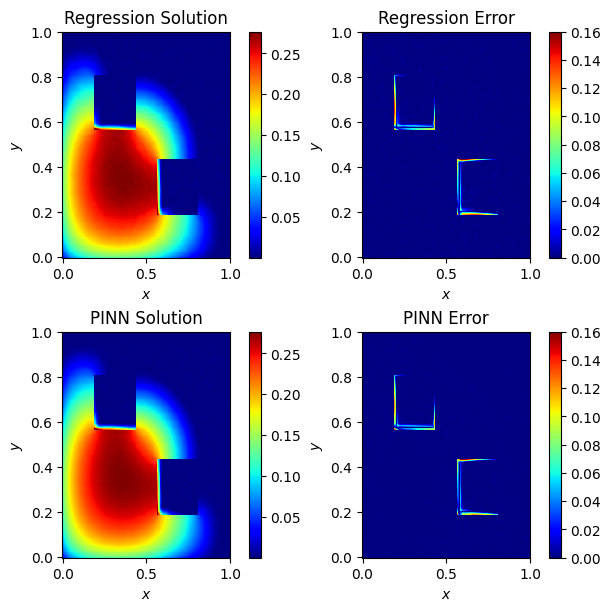

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6), layout='constrained')

vmin = E_ref.min()
vmax = E_ref.max()

pcm = axs[0][0].pcolormesh(X, Y, E_reg, vmin=vmin, vmax=vmax, cmap='jet')
axs[0][0].set_title("Regression Solution")
axs[0][0].set_xlabel("$x$")
axs[0][0].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[0][0])

pcm = axs[0][1].pcolormesh(X, Y, (E_ref - E_reg).abs(), vmin=0, vmax=0.16, cmap='jet')
axs[0][1].set_title("Regression Error")
axs[0][1].set_xlabel("$x$")
axs[0][1].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[0][1])

pcm = axs[1][0].pcolormesh(X, Y, E_pinn, vmin=vmin, vmax=vmax, cmap='jet')
axs[1][0].set_title("PINN Solution")
axs[1][0].set_xlabel("$x$")
axs[1][0].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[1][0])

pcm = axs[1][1].pcolormesh(X, Y, (E_ref - E_pinn).abs(), vmin=0, vmax=0.16, cmap='jet')
axs[1][1].set_title("PINN Error")
axs[1][1].set_xlabel("$x$")
axs[1][1].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[1][1])